In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import os

In [12]:
data = pd.read_csv("Chp5Eg1.csv")
data = data.iloc[: , 1:]
data

,Bread,Vegetables,Fruit,Meat,Poultry,Milk,Wine
0,332,428,354,1437,526,247,427
1,293,559,388,1527,567,239,258
2,372,767,562,1948,927,235,433
3,406,563,341,1507,544,324,407
4,386,608,396,1501,558,319,363
5,438,843,689,2345,1148,243,341
6,534,660,367,1620,638,414,407
7,460,699,484,1856,762,400,416
8,385,789,621,2366,1149,304,282
9,655,776,423,1848,759,495,486


In [13]:
from IPython.core.display import display
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=7).fit(data)
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data)

display(pca_samples)

array([[-632.25429777, -121.62709395,   20.00162742,  -28.42501879,
          65.68412172,   -2.8755248 ,   -5.32176518],
       [-485.57962284, -139.30304597, -136.3002396 ,  -12.51552018,
         -41.00805683,   15.60536001,   -2.16730732],
       [ 114.57227558, -140.96317109,   57.15263749,  110.34249237,
          14.60475537,  -21.32766535,    7.98171539],
       [-517.6437299 ,   11.90317269,   -1.34673014,   -9.04912878,
           6.92656144,  -12.43294982,  -14.38338064],
       [-483.50849343,    2.22699492,  -64.05728   ,   26.58140755,
           6.79276504,    9.84228502,   11.80449909],
       [ 590.73840053, -189.51101343,   69.23537268,   26.43060038,
         -17.81844476,   38.19383263,  -11.16659296],
       [-332.32050552,  141.49939521,   43.21987465,  -18.82158881,
         -25.84639629,   16.48192191,   17.90131869],
       [ -55.26469168,   43.33813378,   31.43166765,  -22.46606469,
          35.37996002,  -19.87714377,   -2.5082472 ],
       [ 574.05134771, -

In [14]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the PCs, eigenvalues and percentage variance explained.
# The eigenvalues obtained may sometimes be slightly different due to difference in method.

def pca_results(data, pca):

    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys())
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue'])
    eigenvalues.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)
display((pca_results))

,Eigenvalue,Explained Variance,Bread,Vegetables,Fruit,Meat,Poultry,Milk,Wine
PC 1,273411.7739,0.8795,0.0685,0.3273,0.3038,0.7555,0.4621,0.0899,-0.0587
PC 2,26158.3319,0.0841,0.5477,0.4201,-0.0886,-0.0894,-0.2810,0.6397,0.1399
PC 3,6724.6013,0.0216,0.4409,-0.3106,-0.3135,0.0558,0.3876,-0.1814,0.6516
PC 4,2130.1585,0.0069,-0.0917,0.6924,0.2342,-0.3624,0.0919,-0.4330,0.3606
PC 5,1963.6940,0.0063,-0.1745,-0.3209,0.6954,0.0386,-0.2490,0.2406,0.5115
PC 6,380.5415,0.0012,0.6781,-0.1663,0.4698,-0.1162,-0.0744,-0.3759,-0.3624
PC 7,96.4218,0.0003,-0.0479,-0.0991,0.2060,-0.5212,0.6937,0.4039,-0.1714


<Figure size 432x288 with 0 Axes>

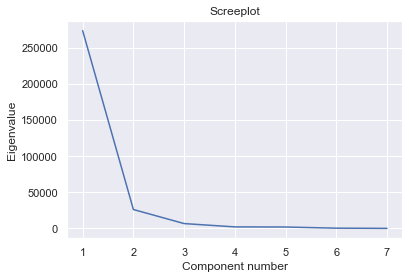

In [15]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

In [16]:
def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(-1, 1)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([-1, 1], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)

    return ax

<Figure size 432x288 with 0 Axes>

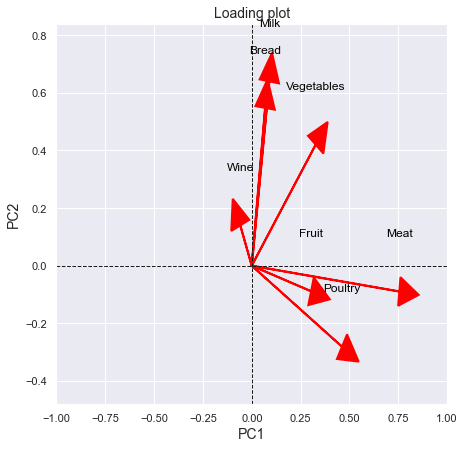

In [17]:

pca2 = PCA(n_components=2).fit(data)
#Note that pca.transform() returns scores based on centred data
pca_samples2 = pca2.transform(data)

plt.clf()
ax2 = loadingplot(data, pca2, width=7, height=7, margin=0.2)
plt.show()


In [18]:
def scoreplot(data, scores, pca, width=10, height=10, margin=10):
    plt.figure(figsize=(width, height))
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores)

    #Scaling factor for text position
    text_pos = 0.2

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin

    # ax.set_xlim(x_min, x_max)
    # ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax

In [19]:
scores2_notcentred = np.dot(data, pca2.components_.T)
scores2_notcentred = pd.DataFrame(scores2_notcentred, columns = ['PC1', 'PC2'])
scores2_notcentred.head()


,PC1,PC2
0,1596.296039,271.671473
1,1742.970714,253.995521
2,2343.122612,252.335396
3,1710.906607,405.201740
4,1745.041843,395.525562


<Figure size 432x288 with 0 Axes>

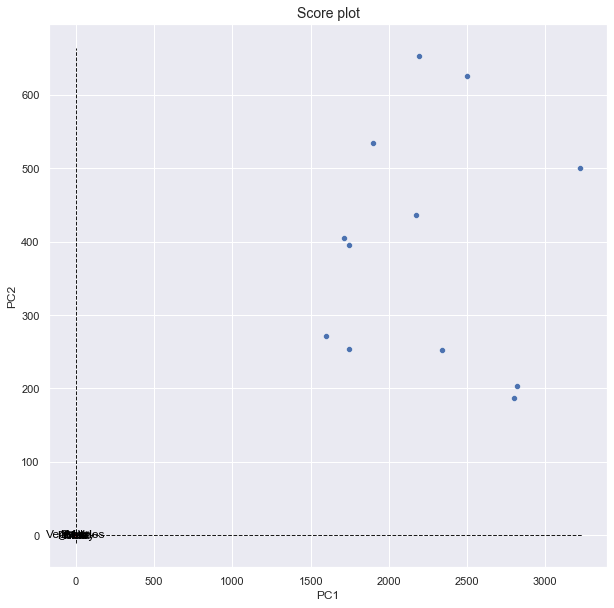

In [21]:
plt.clf()
ax4 = scoreplot(data, scores2_notcentred, pca2)
plt.show()

